In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
from pandas import read_csv
dataframe=read_csv('D:\\Assignment Excelr\\SVM\\forestfires (1).csv')
dataframe

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [28]:
X=dataframe.iloc[:,2:18]
Y=dataframe.iloc[:,19]

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [30]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((361, 16), (361,), (156, 16), (156,))

In [31]:
clf=SVC()
param_grid=[{'kernel':['rbf'],'gamma':[100,50,0.5,0.1,0.01,0.001,0.0001],'C':[15,14,13,12,10,0.1,0.001,0.0001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 10, 0.1, 0.001, 0.0001],
                          'gamma': [100, 50, 0.5, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}])

In [32]:
gsv.best_params_ ,  gsv.best_score_

({'C': 14, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.9529279279279279)

In [33]:
clf=SVC(C=15,gamma=0.0001)
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
acc = accuracy_score(y_train,y_pred_train)*100
print("Accuracy=",acc)
print(confusion_matrix(y_train,y_pred_train))
y_pred_test=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred_test)*100
print("Accuracy =",acc)
print(confusion_matrix(y_test,y_pred_test))

Accuracy= 97.78393351800554
[[239   3]
 [  5 114]]
Accuracy = 98.71794871794873
[[91  0]
 [ 2 63]]


In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

((387, 16), (387,), (130, 16), (130,))

In [35]:
lreg=LinearRegression()
lreg.fit(x_train,y_train)
#generate prediction on test set
lreg_y_pred = lreg.predict(x_test)
#calculate mean squard error
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("mean squared error on test set:" , mean_squared_error)
#putting together the coffecient and their corresponding varibale names
lreg_cofficient=pd.DataFrame()
lreg_cofficient["Columns"]=x_train.columns
lreg_cofficient["Coefficient Estimate"]=pd.Series(lreg.coef_)
print(lreg_cofficient)

mean squared error on test set: 0.16397265562034713
   Columns  Coefficient Estimate
0     FFMC             -0.002426
1      DMC              0.002884
2       DC             -0.000260
3      ISI              0.013599
4     temp              0.027405
5       RH              0.005703
6     wind              0.034434
7     rain              0.109493
8     area             -0.000467
9   dayfri             -0.149906
10  daymon             -0.047810
11  daysat             -0.012280
12  daysun              0.040826
13  daythu              0.030574
14  daytue              0.064110
15  daywed              0.074486


In [15]:
import seaborn as sns
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x000001CCB0320670>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
    Show point estimates and confidence intervals as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    va

<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

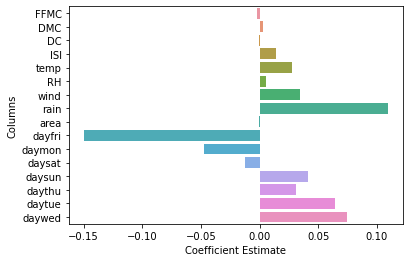

In [36]:
sns.barplot(x='Coefficient Estimate', y='Columns',data=lreg_cofficient,orient='h')

In [37]:
from sklearn.linear_model import Ridge

In [38]:
#train the model
ridgeR=Ridge(alpha=2)
ridgeR.fit(x_train,y_train)
y_pred=ridgeR.predict(x_test)
lreg_y_pred = lreg.predict(x_test)
#calculate mean squard error
mean_squared_error = np.mean((y_pred - y_test)**2)
print("mean squared error on test set:" , mean_squared_error)
#putting together the coffecient and their corresponding varibale names
ridge_cofficient=pd.DataFrame()
ridge_cofficient["Columns"]=x_train.columns
ridge_cofficient["Coefficient Estimate"]=pd.Series(ridgeR.coef_)
print(ridge_cofficient)

mean squared error on test set: 0.16164500393505643
   Columns  Coefficient Estimate
0     FFMC             -0.002390
1      DMC              0.002882
2       DC             -0.000261
3      ISI              0.013598
4     temp              0.027600
5       RH              0.005774
6     wind              0.034681
7     rain              0.072236
8     area             -0.000469
9   dayfri             -0.145042
10  daymon             -0.045877
11  daysat             -0.011969
12  daysun              0.039833
13  daythu              0.029315
14  daytue              0.062585
15  daywed              0.071155


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

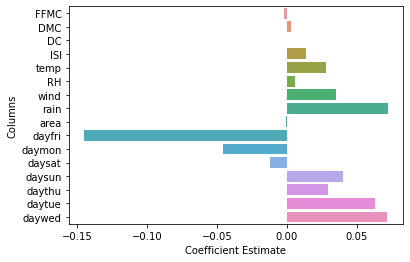

In [39]:
sns.barplot(x='Coefficient Estimate', y='Columns',data=ridge_cofficient,orient='h')

In [40]:
from sklearn.linear_model import Lasso

In [41]:
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_pred1=lasso.predict(x_test)


#calculate mean squard error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("mean squared error on test set:" , mean_squared_error)

#putting together the coffecient and their corresponding varibale names
lasso_coff=pd.DataFrame()
lasso_coff["Columns"]=x_train.columns
lasso_coff["Coefficient Estimate"]=pd.Series(lasso.coef_)
print(lasso_coff)

mean squared error on test set: 0.15082240170333178
   Columns  Coefficient Estimate
0     FFMC             -0.000000
1      DMC              0.003184
2       DC             -0.000271
3      ISI              0.011294
4     temp              0.019611
5       RH              0.003977
6     wind              0.000000
7     rain              0.000000
8     area             -0.000418
9   dayfri             -0.000000
10  daymon             -0.000000
11  daysat             -0.000000
12  daysun              0.000000
13  daythu              0.000000
14  daytue              0.000000
15  daywed              0.000000


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

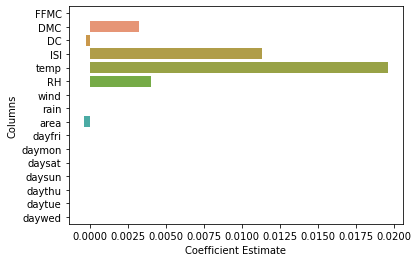

In [42]:
sns.barplot(x='Coefficient Estimate', y='Columns',data=lasso_coff,orient='h')

In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=7)

In [46]:
model=XGBClassifier(n_estimators=90,max_depth=3)
model.fit(X_train,y_train)

[22:40:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\yugan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
y_pred=model.predict(X_test)
#prediction =[round(value) for value in y_pred]
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [43]:
#Salary Dataset

In [3]:
from pandas import read_csv
dataframe=read_csv('D:\\Assignment Excelr\\SVM\\SalaryData_Test(1).csv')
data=read_csv('D:\\Assignment Excelr\\SVM\\SalaryData_Train(1).csv')

In [4]:
dataframe

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25.0,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34.0,Private,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33.0,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
15056,39.0,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
15057,38.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
15058,44.0,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [5]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
X=dataframe.iloc[:,[0,3,9,10,11]]
Y=dataframe.iloc[:,11]

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [8]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((10542, 5), (10542,), (4518, 5), (4518,))

In [ ]:
clf=SVC()
param_grid=[{'kernel':['rbf'],'gamma':[100,50,0.5,0.1,0.01,0.001,0.0001],'C':[15,14,13,12,10,0.1,0.001,0.0001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

C:\Users\yugan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [ ]:
gsv.best_params_ ,  gsv.best_score_

In [51]:
clf=SVC(C=15,gamma=0.0001)
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
acc = accuracy_score(y_train,y_pred_train)*100
print("Accuracy=",acc)
print(confusion_matrix(y_train,y_pred_train))
y_pred_test=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred_test)*100
print("Accuracy =",acc)
print(confusion_matrix(y_test,y_pred_test))

Accuracy= 88.12292769832236
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  2 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  1  7]
 [ 0  0  0 ...  0  0 56]]
Accuracy = 87.29154108900944
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0 20]]


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [53]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

((22620, 5), (22620,), (7541, 5), (7541,))

In [54]:
lreg=LinearRegression()
lreg.fit(x_train,y_train)
#generate prediction on test set
lreg_y_pred = lreg.predict(x_test)
#calculate mean squard error
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("mean squared error on test set:" , mean_squared_error)
#putting together the coffecient and their corresponding varibale names
lreg_cofficient=pd.DataFrame()
lreg_cofficient["Columns"]=x_train.columns
lreg_cofficient["Coefficient Estimate"]=pd.Series(lreg.coef_)
print(lreg_cofficient)

mean squared error on test set: 1.6164613614523694e-26
        Columns  Coefficient Estimate
0           age         -3.410998e-16
1   educationno         -2.553079e-15
2   capitalgain         -1.431147e-17
3   capitalloss         -1.812379e-16
4  hoursperweek          1.000000e+00


In [13]:
import seaborn as sns
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x00000195DC931700>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
    Show point estimates and confidence intervals as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    va

<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

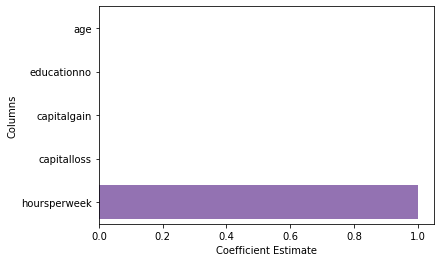

In [14]:
sns.barplot(x='Coefficient Estimate', y='Columns',data=lreg_cofficient,orient='h')


In [15]:
from sklearn.linear_model import Ridge

In [49]:
ridgeR=Ridge(alpha=2)
ridgeR.fit(x_train,y_train)
y_pred=ridgeR.predict(x_test)
lreg_y_pred = lreg.predict(x_test)
#calculate mean squard error
mean_squared_error = np.mean((y_pred - y_test)**2)
print("mean squared error on test set:" , mean_squared_error)
#putting together the coffecient and their corresponding varibale names
ridge_cofficient=pd.DataFrame()
ridge_cofficient["Columns"]=x_train.columns
ridge_cofficient["Coefficient Estimate"]=pd.Series(ridgeR.coef_)
print(ridge_cofficient)

ValueError: Found input variables with inconsistent numbers of samples: [22620, 20207]

<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

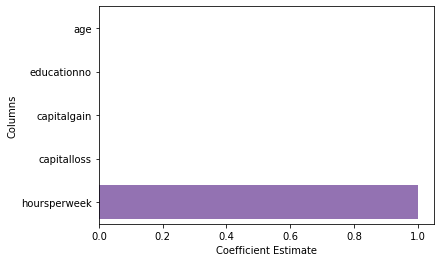

In [17]:
sns.barplot(x='Coefficient Estimate', y='Columns',data=ridge_cofficient,orient='h')

In [18]:
from sklearn.linear_model import Lasso

In [19]:
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_pred1=lasso.predict(x_test)


#calculate mean squard error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("mean squared error on test set:" , mean_squared_error)

#putting together the coffecient and their corresponding varibale names
lasso_coff=pd.DataFrame()
lasso_coff["Columns"]=x_train.columns
lasso_coff["Coefficient Estimate"]=pd.Series(lasso.coef_)
print(lasso_coff)

mean squared error on test set: 7.727927648069271e-05
        Columns  Coefficient Estimate
0           age          0.000000e+00
1   educationno          0.000000e+00
2   capitalgain          9.824939e-08
3   capitalloss          6.076668e-07
4  hoursperweek          9.992904e-01


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

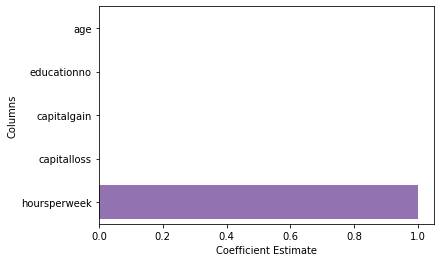

In [20]:
sns.barplot(x='Coefficient Estimate', y='Columns',data=lasso_coff,orient='h')

In [21]:
from sklearn.linear_model import ElasticNet

In [22]:
e_net=ElasticNet(alpha=0.1)
e_net.fit(x_train,y_train)
y_pred_elastic=lasso.predict(x_test)


#calculate mean squard error
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("mean squared error on test set:" , mean_squared_error)

#putting together the coffecient and their corresponding varibale names
e_net_coff=pd.DataFrame()
e_net_coff["Columns"]=x_train.columns
e_net_coff["Coefficient Estimate"]=pd.Series(e_net.coef_)
print(e_net_coff)

mean squared error on test set: 7.727927648069271e-05
        Columns  Coefficient Estimate
0           age          0.000000e+00
1   educationno          0.000000e+00
2   capitalgain          9.955559e-08
3   capitalloss          9.180316e-07
4  hoursperweek          9.992899e-01


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

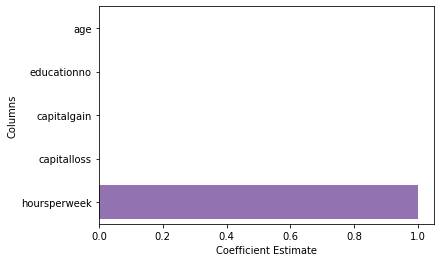

In [23]:
sns.barplot(x='Coefficient Estimate', y='Columns',data=e_net_coff,orient='h')

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=7)

In [28]:
model=XGBClassifier(n_estimators=90,max_depth=3)
model.fit(X_train,y_train)

C:\Users\yugan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:13:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [29]:
y_pred=model.predict(X_test)
#prediction =[round(value) for value in y_pred]
y_pred

array([40., 40., 40., ..., 30., 40., 80.])

In [30]:
X=data.iloc[:,[0,3,9,10,11]]
Y=data.iloc[:,11]

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [32]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((21112, 5), (21112,), (9049, 5), (9049,))

In [33]:
clf=SVC(C=15,gamma=0.0001)
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
acc = accuracy_score(y_train,y_pred_train)*100
print("Accuracy=",acc)
print(confusion_matrix(y_train,y_pred_train))
y_pred_test=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred_test)*100
print("Accuracy =",acc)
print(confusion_matrix(y_test,y_pred_test))

Accuracy= 88.55153467222434
[[ 1  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0  3 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  3  6]
 [ 0  0  0 ...  0  0 55]]
Accuracy = 87.39087191954911
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  2]
 [ 0  0  0 ...  0  1 21]]


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

((22620, 5), (22620,), (7541, 5), (7541,))

In [36]:
lreg=LinearRegression()
lreg.fit(x_train,y_train)
#generate prediction on test set
lreg_y_pred = lreg.predict(x_test)
#calculate mean squard error
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("mean squared error on test set:" , mean_squared_error)
#putting together the coffecient and their corresponding varibale names
lreg_cofficient=pd.DataFrame()
lreg_cofficient["Columns"]=x_train.columns
lreg_cofficient["Coefficient Estimate"]=pd.Series(lreg.coef_)
print(lreg_cofficient)

mean squared error on test set: 2.967703601565012e-26
        Columns  Coefficient Estimate
0           age          8.184860e-16
1   educationno          2.421240e-15
2   capitalgain         -1.561251e-17
3   capitalloss         -2.361799e-16
4  hoursperweek          1.000000e+00


In [37]:
import seaborn as sns

<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

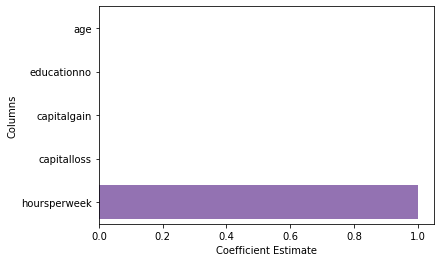

In [38]:
sns.barplot(x='Coefficient Estimate', y='Columns',data=lreg_cofficient,orient='h')

In [39]:
ridgeR=Ridge(alpha=2)
ridgeR.fit(x_train,y_train)
y_pred=ridgeR.predict(x_test)
lreg_y_pred = lreg.predict(x_test)
#calculate mean squard error
mean_squared_error = np.mean((y_pred - y_test)**2)
print("mean squared error on test set:" , mean_squared_error)
#putting together the coffecient and their corresponding varibale names
ridge_cofficient=pd.DataFrame()
ridge_cofficient["Columns"]=x_train.columns
ridge_cofficient["Coefficient Estimate"]=pd.Series(ridgeR.coef_)
print(ridge_cofficient)

mean squared error on test set: 5.799742770747035e-11
        Columns  Coefficient Estimate
0           age          5.260593e-08
1   educationno          4.045224e-07
2   capitalgain          6.149036e-11
3   capitalloss          7.670516e-10
4  hoursperweek          9.999994e-01


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

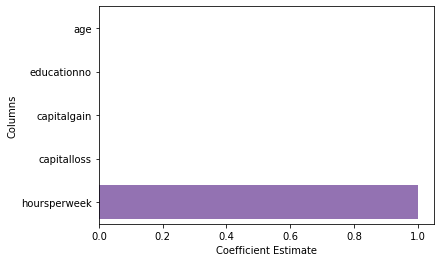

In [40]:
sns.barplot(x='Coefficient Estimate', y='Columns',data=ridge_cofficient,orient='h')


In [41]:
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_pred1=lasso.predict(x_test)


#calculate mean squard error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("mean squared error on test set:" , mean_squared_error)

#putting together the coffecient and their corresponding varibale names
lasso_coff=pd.DataFrame()
lasso_coff["Columns"]=x_train.columns
lasso_coff["Coefficient Estimate"]=pd.Series(lasso.coef_)
print(lasso_coff)

mean squared error on test set: 7.221955541070722e-05
        Columns  Coefficient Estimate
0           age          0.000000e+00
1   educationno          0.000000e+00
2   capitalgain          9.299054e-08
3   capitalloss          5.928225e-07
4  hoursperweek          9.992936e-01


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

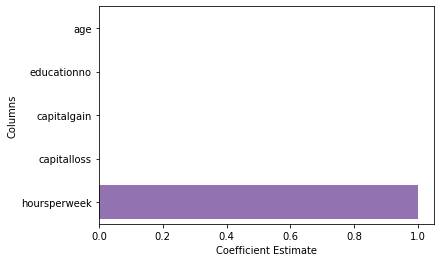

In [42]:
sns.barplot(x='Coefficient Estimate', y='Columns',data=lasso_coff,orient='h')

In [43]:
e_net=ElasticNet(alpha=0.1)
e_net.fit(x_train,y_train)
y_pred_elastic=lasso.predict(x_test)


#calculate mean squard error
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("mean squared error on test set:" , mean_squared_error)

#putting together the coffecient and their corresponding varibale names
e_net_coff=pd.DataFrame()
e_net_coff["Columns"]=x_train.columns
e_net_coff["Coefficient Estimate"]=pd.Series(e_net.coef_)
print(e_net_coff)

mean squared error on test set: 7.221955541070722e-05
        Columns  Coefficient Estimate
0           age          0.000000e+00
1   educationno          0.000000e+00
2   capitalgain          9.441280e-08
3   capitalloss          9.002230e-07
4  hoursperweek          9.992932e-01


In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=7)

In [45]:
model=XGBClassifier(n_estimators=90,max_depth=3)
model.fit(X_train,y_train)

C:\Users\yugan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [46]:
y_pred=model.predict(X_test)
#prediction =[round(value) for value in y_pred]
y_pred

array([40, 40, 30, ..., 40, 40, 40], dtype=int64)